In [1]:

import pymysql.cursors
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
host = 'den1.mysql6.gear.host'
db = 'situation'
usr = 'situation'
pwd = input("Enter your database password: ")

try: 
    connection = pymysql.connect(host=host, user=usr, password=pwd, database=db, 
                                 cursorclass=pymysql.cursors.DictCursor)
    print("Succesfull!")
except pymysql.Error as err:
    print("Error %d: %s" % (err.args[0], err.args[1]))
    connection = None

table_names = [
    'c3_devicecalibration',
    'c3_device_properties',
    'c3_devices',
    'c3_devices_depr',
    'c3_devices_properties_temp'
]

data_frames = {}

if connection:
    for table_name in table_names:
        sql = f"SELECT * FROM {table_name};"
        try:
            data_frames[table_name] = pd.read_sql(sql, connection)
            print(f"{table_name} ")
            display(data_frames[table_name].head())
        except pymysql.Error as err:
            print(f"Hata %d: %s - {table_name}" % (err.args[0], err.args[1]))

connection.close()


Succesfull!
c3_devicecalibration 


,ID,DeviceID,CalibrationDate,CalibrationDueDate,CalibrationResult,Technician,GroupLabel,Measurement1,Measurement2,Measurement3,Status
0,1,Device001,2024-01-01 11:21:16,2025-03-06 11:21:16,Pass,John Smith,Group3,0.001103,0.002149,0.003052,Operational
1,2,Device002,2023-11-04 11:21:16,2025-01-24 11:21:16,Adjust,John Smith,Group1,0.000872,0.002020,0.003120,Operational
2,3,Device003,2023-06-07 11:21:16,2024-08-18 11:21:16,Pass,Bob Lee,Group3,0.001084,0.001953,0.002962,Operational
3,4,Device004,2024-02-02 11:21:16,2024-08-28 11:21:16,Adjust,John Smith,Group2,0.000851,0.002181,0.003069,Operational
4,5,Device005,2023-12-03 11:21:16,2024-07-03 11:21:16,Adjust,John Smith,Group2,0.000893,0.001771,0.003035,Failed


c3_device_properties 


,id,category,subcategory,attribute,value
0,1,3D Printing Equipment,3D Printer Accessories,Color,Blue
1,2,3D Printing Equipment,3D Printer Accessories,Color,Clear
2,3,3D Printing Equipment,3D Printer Accessories,Color,Red
3,4,3D Printing Equipment,3D Printer Accessories,Color,Transparent
4,5,3D Printing Equipment,3D Printer Accessories,Color,Transparent Blue


c3_devices 


,id,name,property_hash
0,1,Agilent 1260 Infinity II LC,None
1,2,Nexera X2,None
2,3,ACQUITY UPLC H-Class System,None


c3_devices_depr 


,Device_ID,Model,Serial_Number,Manufacturer,Performance_Specifications,Output_Type,Device_Type,Sample_Material,Measurement_Range,Purchase_Date,Calibration_Date,Room,Location,Condition


c3_devices_properties_temp 


,id,attribute,value,d_id
0,1,Column Capacity,4,1
1,2,Column ID Reader Option,Optional,1
2,3,Depth,468 mm,1
3,4,Flow Range,"0.05 to 5 mL/min with G7112B, 0.2 to 10 mL/min...",1
4,5,Injection Range,"0.1-100 µL, 0.1-900 µL with Extended Injection...",1


In [4]:
# Statistical analysis for every table
for table_name, df in data_frames.items():
    if not df.empty:
        print(f"### {table_name} ###")
        display(df.describe())


### c3_devicecalibration ###


,ID,Measurement1,Measurement2,Measurement3
count,57.000000,57.000000,57.000000,57.000000
mean,29.000000,0.000999,0.001986,0.002986
std,16.598193,0.000109,0.000097,0.000108
min,1.000000,0.000801,0.001771,0.002649
25%,15.000000,0.000912,0.001922,0.002920
50%,29.000000,0.001008,0.002009,0.002974
75%,43.000000,0.001071,0.002049,0.003069
max,57.000000,0.001228,0.002181,0.003310


### c3_device_properties ###


,id
count,56061.000000
mean,28031.000000
std,16183.561057
min,1.000000
25%,14016.000000
50%,28031.000000
75%,42046.000000
max,56061.000000


### c3_devices ###


,id
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


### c3_devices_properties_temp ###


,id,d_id
count,12.000000,12.0
mean,6.500000,1.0
std,3.605551,0.0
min,1.000000,1.0
25%,3.750000,1.0
50%,6.500000,1.0
75%,9.250000,1.0
max,12.000000,1.0


In [6]:
# Functions for visualization
def plot_scatter(df, x_column, y_column, hue_column=None, title=None):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_column, y=y_column, hue=hue_column)
    plt.title(title if title else f'{x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.show()

def plot_count(df, column, title=None):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(title if title else f'{column} Counts')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

def plot_hist(df, column, bins=30, title=None):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, bins=bins, kde=True)
    plt.title(title if title else f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def plot_box(df, column, title=None):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column)
    plt.title(title if title else f'{column} Box Plot')
    plt.xlabel(column)
    plt.show()

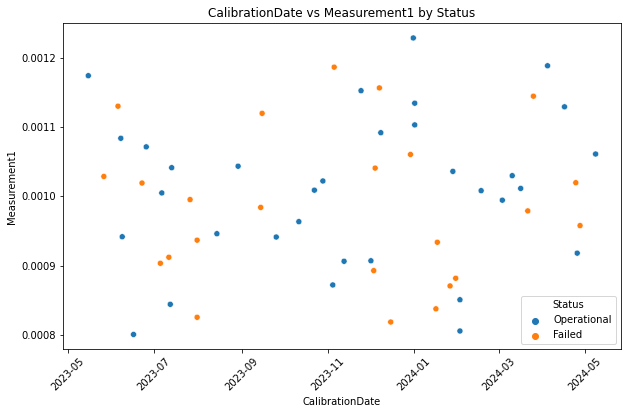

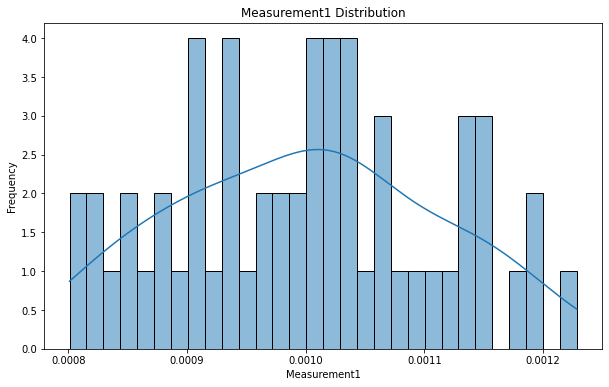

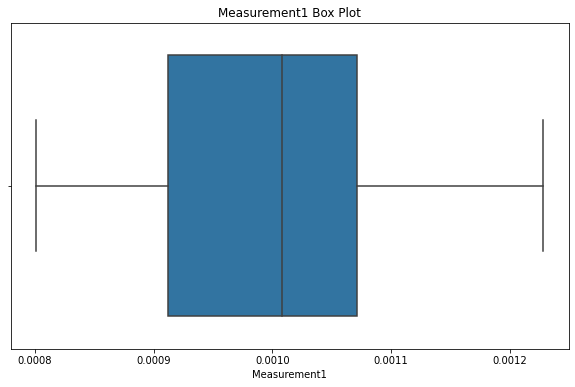

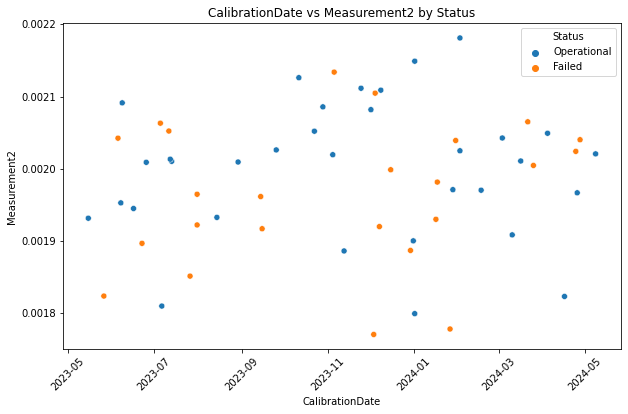

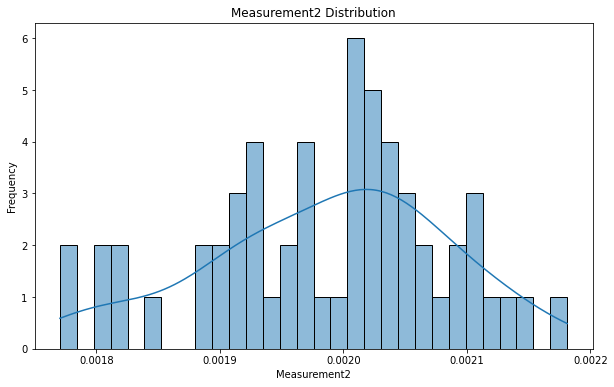

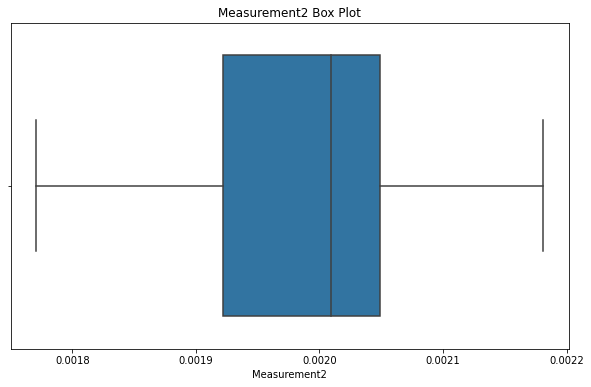

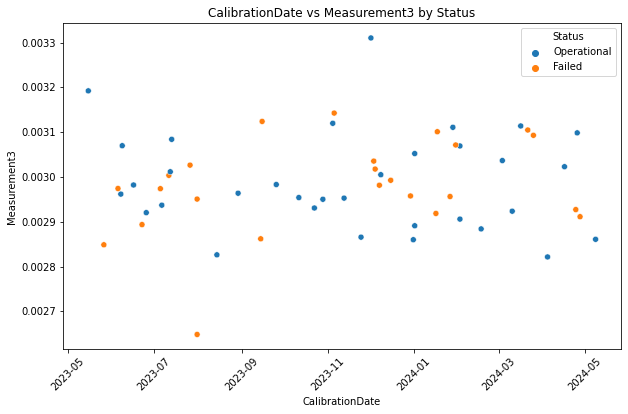

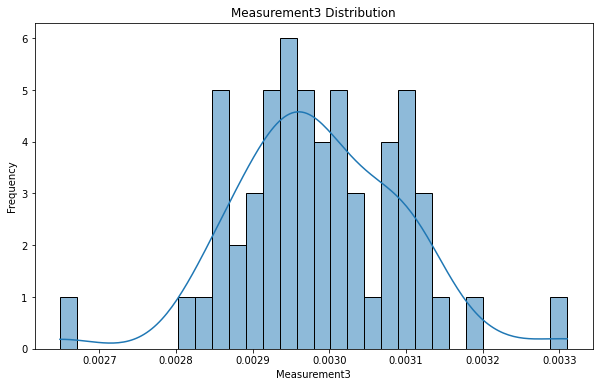

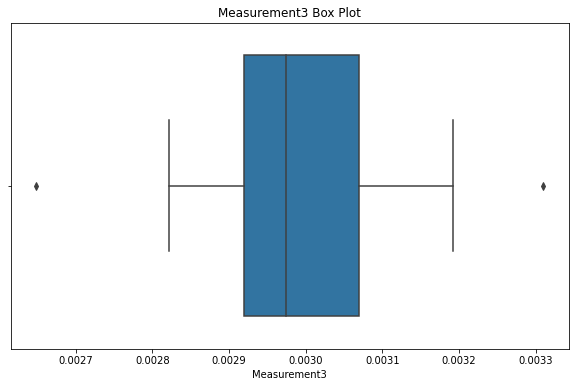

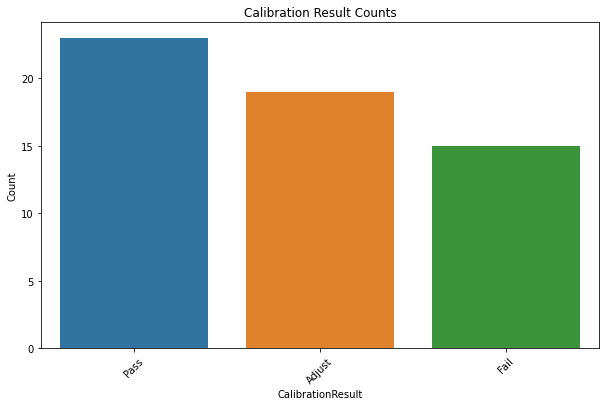

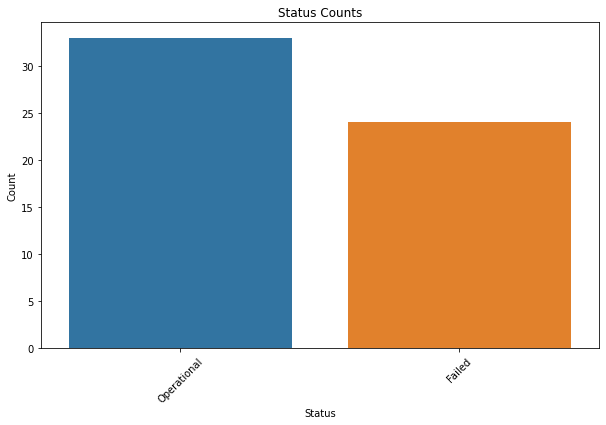

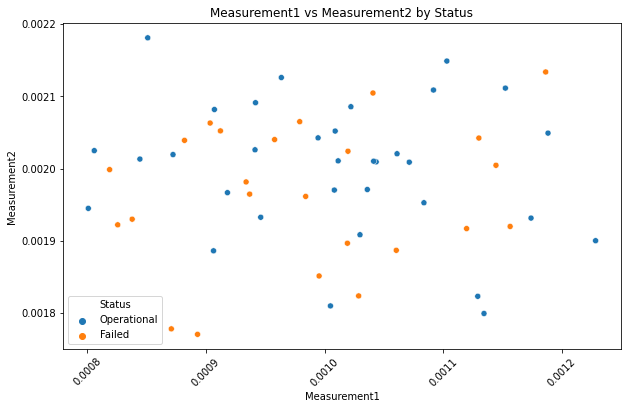

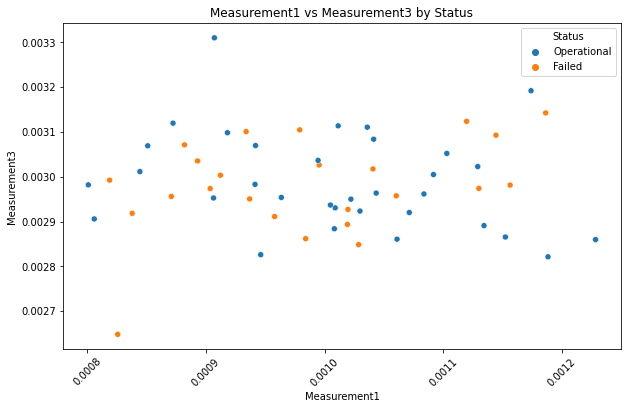

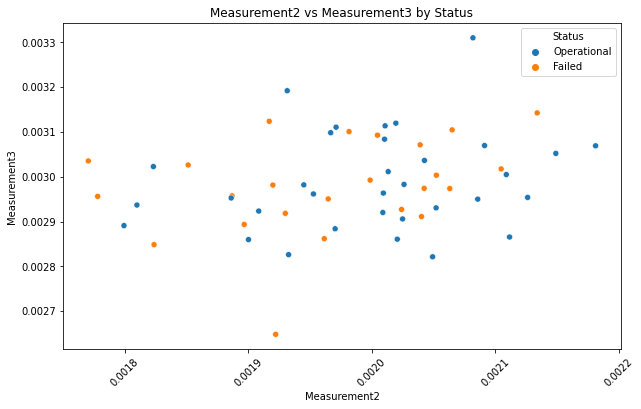

In [10]:
# c3_devicecalibration
df_devicecalibration = data_frames['c3_devicecalibration']

# CalibrationDate vs Measurement1 scatter plot
plot_scatter(df_devicecalibration, 'CalibrationDate', 'Measurement1', 'Status', 'CalibrationDate vs Measurement1 by Status')

# Measurement1 Distribution
plot_hist(df_devicecalibration, 'Measurement1', title='Measurement1 Distribution')

# Measurement1 Box Plot
plot_box(df_devicecalibration, 'Measurement1', title='Measurement1 Box Plot')

# Other Visualizations
plot_scatter(df_devicecalibration, 'CalibrationDate', 'Measurement2', 'Status', 'CalibrationDate vs Measurement2 by Status')
plot_hist(df_devicecalibration, 'Measurement2', title='Measurement2 Distribution')
plot_box(df_devicecalibration, 'Measurement2', title='Measurement2 Box Plot')

plot_scatter(df_devicecalibration, 'CalibrationDate', 'Measurement3', 'Status', 'CalibrationDate vs Measurement3 by Status')
plot_hist(df_devicecalibration, 'Measurement3', title='Measurement3 Distribution')
plot_box(df_devicecalibration, 'Measurement3', title='Measurement3 Box Plot')

# CalibrationResult Counts
plot_count(df_devicecalibration, 'CalibrationResult', title='Calibration Result Counts')

# Status Counts
plot_count(df_devicecalibration, 'Status', title='Status Counts')

# Measurement1 vs Measurement2 scatter plot
plot_scatter(df_devicecalibration, 'Measurement1', 'Measurement2', 'Status', 'Measurement1 vs Measurement2 by Status')

# Measurement1 vs Measurement3 scatter plot
plot_scatter(df_devicecalibration, 'Measurement1', 'Measurement3', 'Status', 'Measurement1 vs Measurement3 by Status')

# Measurement2 vs Measurement3 scatter plot
plot_scatter(df_devicecalibration, 'Measurement2', 'Measurement3', 'Status', 'Measurement2 vs Measurement3 by Status')


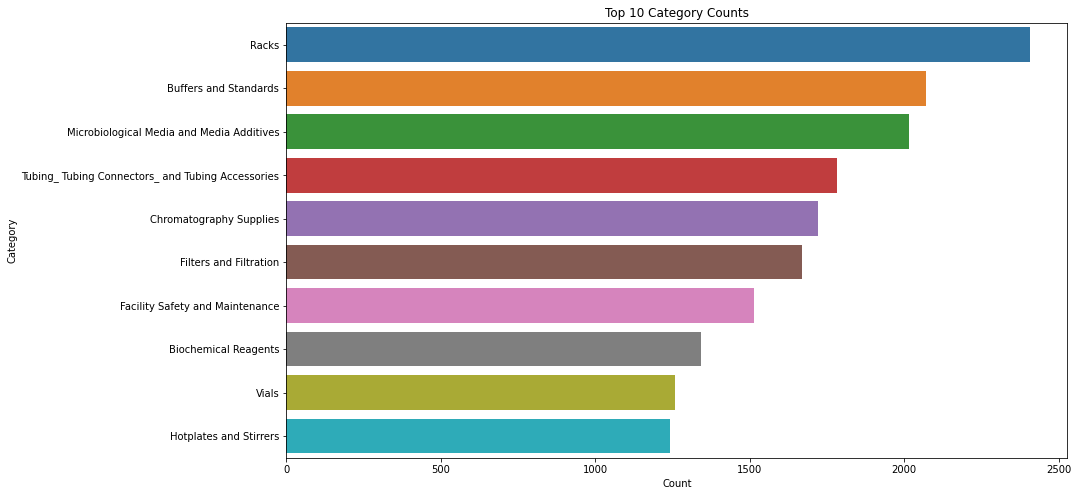

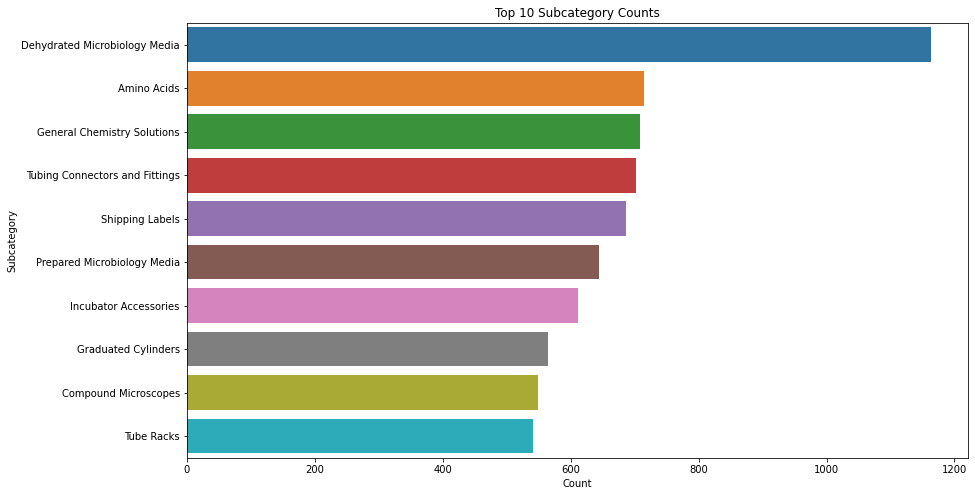

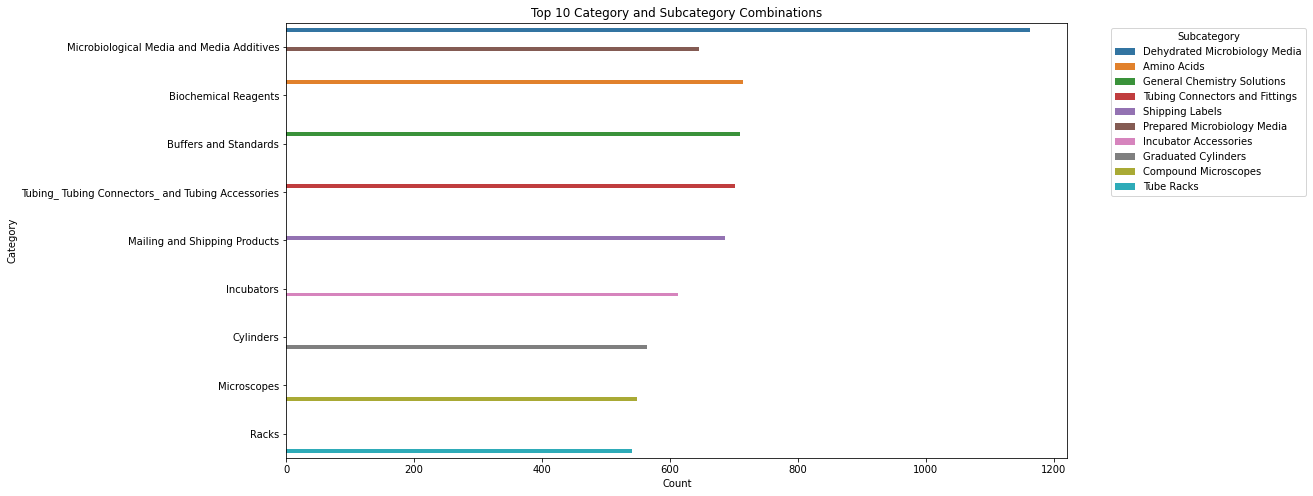

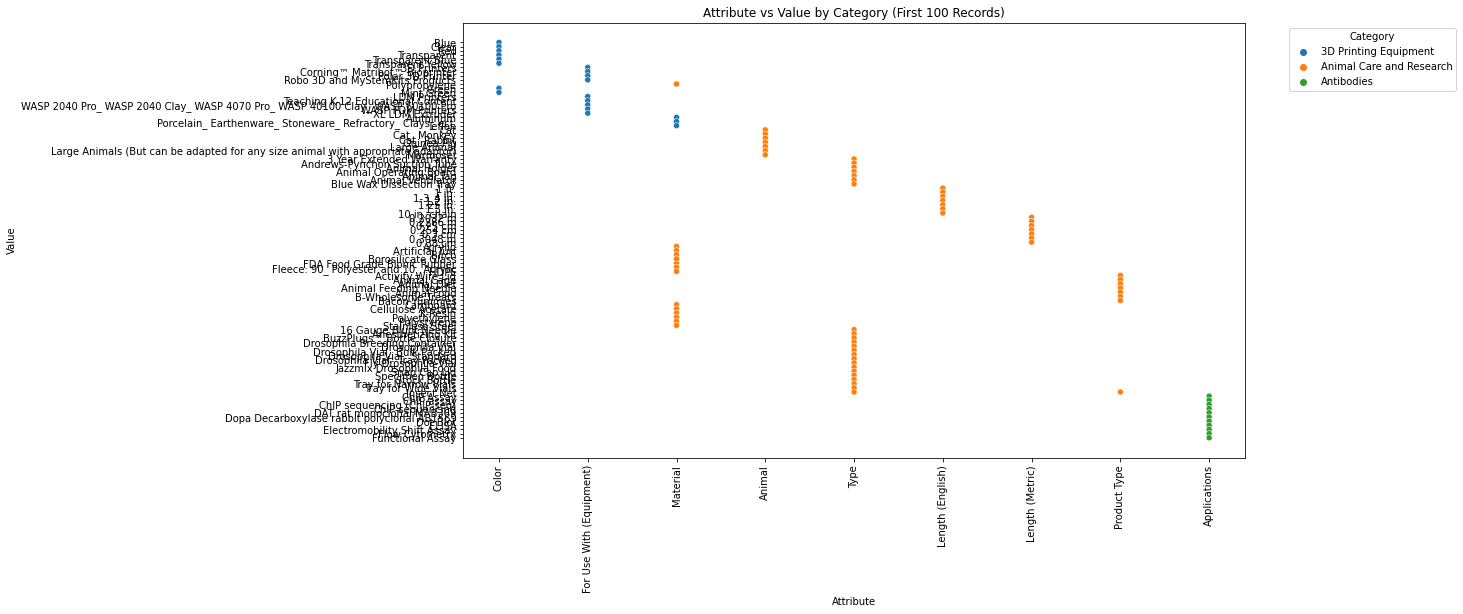

In [14]:
# c3_device_properties 
df_device_properties = data_frames['c3_device_properties']

# top 10 for categories
top_10_categories = df_device_properties['category'].value_counts().nlargest(10).index
df_top_10_categories = df_device_properties[df_device_properties['category'].isin(top_10_categories)]

# Category Counts (Top 10)
plt.figure(figsize=(14, 8))
sns.countplot(data=df_top_10_categories, y='category', order=top_10_categories)
plt.title('Top 10 Category Counts')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Top 10 for subcategories
top_10_subcategories = df_device_properties['subcategory'].value_counts().nlargest(10).index
df_top_10_subcategories = df_device_properties[df_device_properties['subcategory'].isin(top_10_subcategories)]

# Subcategory Counts (Top 10)
plt.figure(figsize=(14, 8))
sns.countplot(data=df_top_10_subcategories, y='subcategory', order=top_10_subcategories)
plt.title('Top 10 Subcategory Counts')
plt.xlabel('Count')
plt.ylabel('Subcategory')
plt.show()

# Category ve Subcategory Counts 
top_category_subcategory = df_device_properties.groupby(['category', 'subcategory']).size().reset_index(name='count')
top_category_subcategory = top_category_subcategory.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_category_subcategory, x='count', y='category', hue='subcategory')
plt.title('Top 10 Category and Subcategory Combinations')
plt.xlabel('Count')
plt.ylabel('Category')
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Attribute vs Value scatter plot (first 100 records for clarity, or categorize attributes)
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_device_properties.head(100), x='attribute', y='value', hue='category')
plt.title('Attribute vs Value by Category (First 100 Records)')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



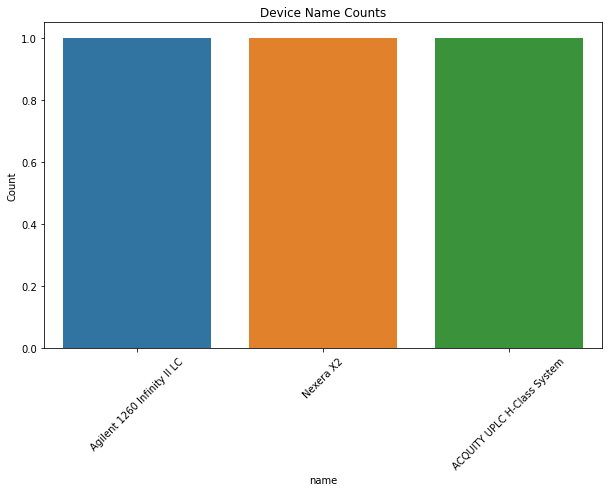

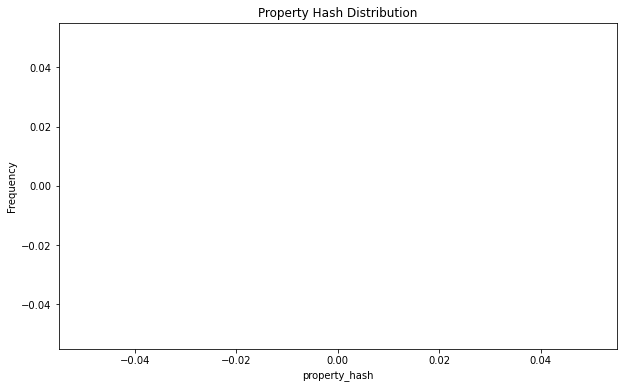

In [16]:
# c3_devices 
df_devices = data_frames['c3_devices']

# Device Name Counts
plot_count(df_devices, 'name', title='Device Name Counts')

# Visualisations
if 'property_hash' in df_devices.columns:
    plot_hist(df_devices, 'property_hash', title='Property Hash Distribution')




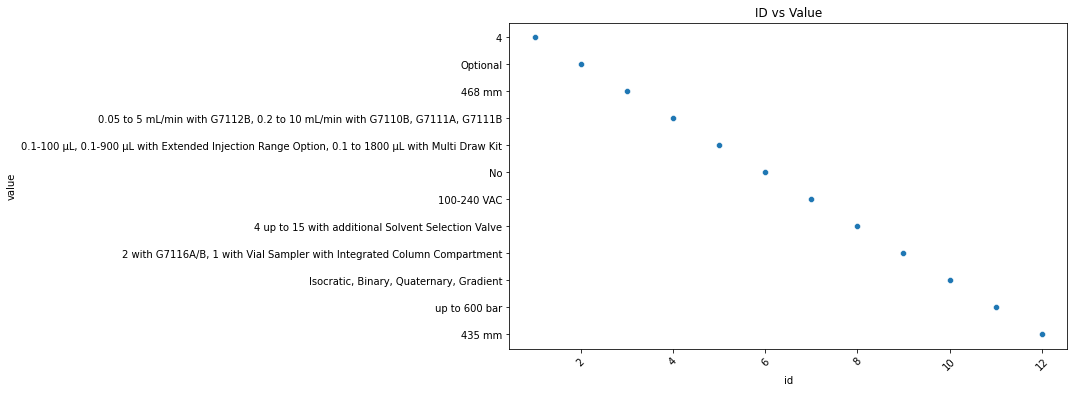

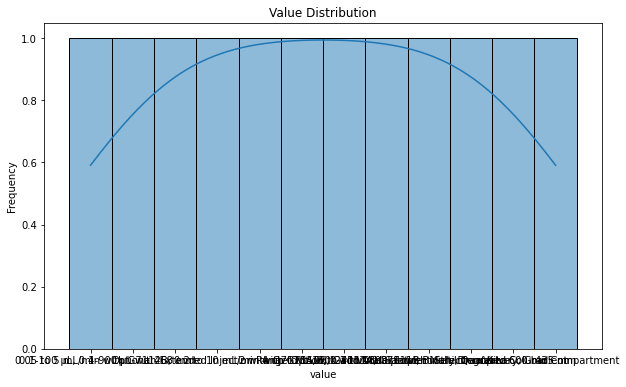

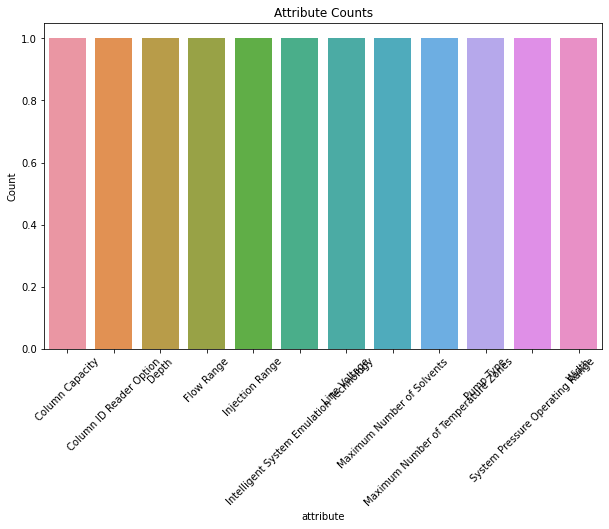

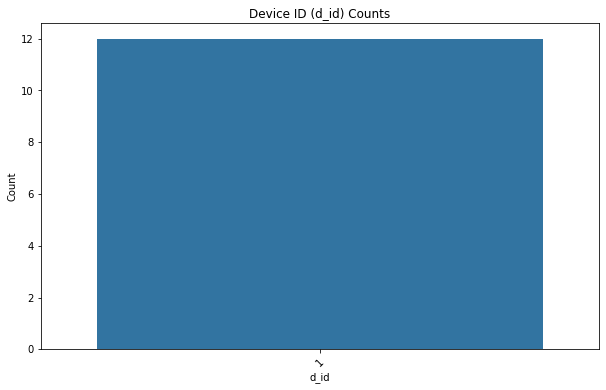

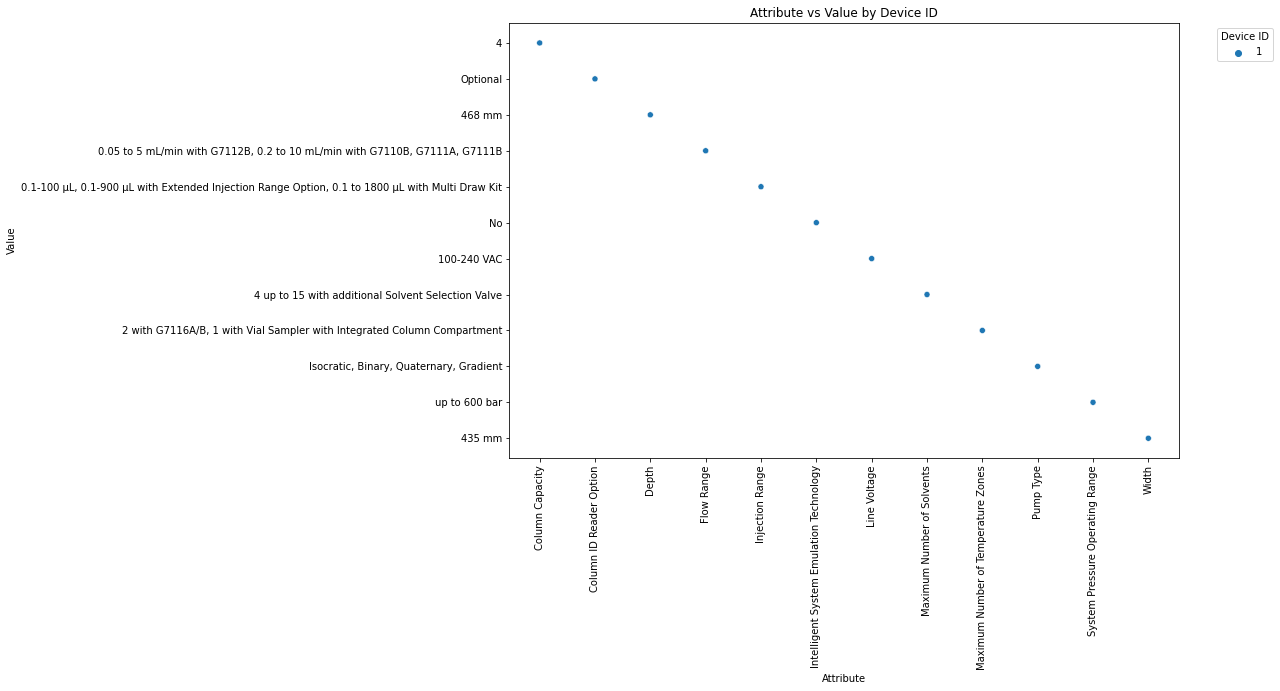

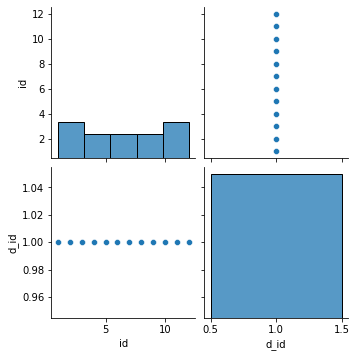

In [17]:
# c3_devices_properties_temp 
df_devices_properties_temp = data_frames['c3_devices_properties_temp']

# ID vs Value Scatter Plot
plot_scatter(df_devices_properties_temp, 'id', 'value', title='ID vs Value')

# Value Distribution
plot_hist(df_devices_properties_temp, 'value', title='Value Distribution')

# Attribute Counts
plot_count(df_devices_properties_temp, 'attribute', title='Attribute Counts')

# d_id Counts
plot_count(df_devices_properties_temp, 'd_id', title='Device ID (d_id) Counts')

# Attribute vs Value scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_devices_properties_temp, x='attribute', y='value', hue='d_id')
plt.title('Attribute vs Value by Device ID')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend(title='Device ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Pairplot for numeric columns
sns.pairplot(df_devices_properties_temp.select_dtypes(include=['float64', 'int64']))
plt.show()
